In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

In [57]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
submission=pd.read_csv("gender_submission.csv",index_col='PassengerId')

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


0    549
1    342
Name: Survived, dtype: int64

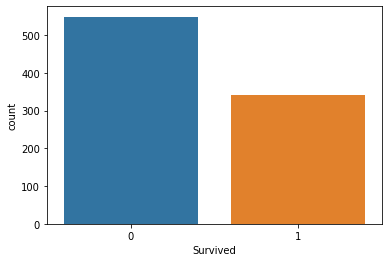

In [59]:
sns.countplot(train['Survived'])
train['Survived'].value_counts()

In [60]:
##결측치 처리
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [61]:
## Cabin feature 삭제
train=train.drop(columns='Cabin')
test=test.drop(columns='Cabin')

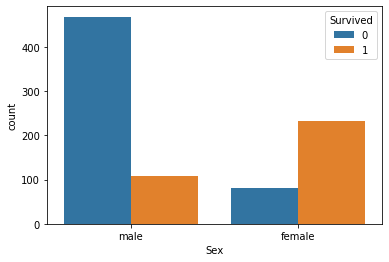

In [62]:
#sex
sns.countplot(data=train,x='Sex',hue='Survived')

In [63]:
## female 1, male 0
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1
test.loc[test['Sex']=='male','Sex']=0
test.loc[test['Sex']=='female','Sex']=1

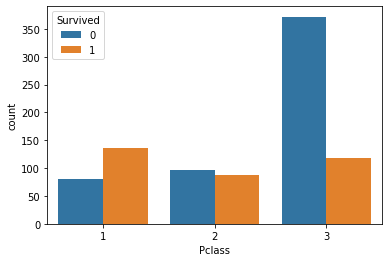

In [64]:
### PClass
sns.countplot(data=train,x='Pclass',hue='Survived')

In [65]:
train['Pclass_3']=(train['Pclass']==3)
train['Pclass_2']=(train['Pclass']==2)
train['Pclass_1']=(train['Pclass']==1)

test['Pclass_3']=(test['Pclass']==3)
test['Pclass_2']=(test['Pclass']==2)
test['Pclass_1']=(test['Pclass']==1)

In [66]:
train=train.drop(columns='Pclass')
test=test.drop(columns='Pclass')

# Age & Fare

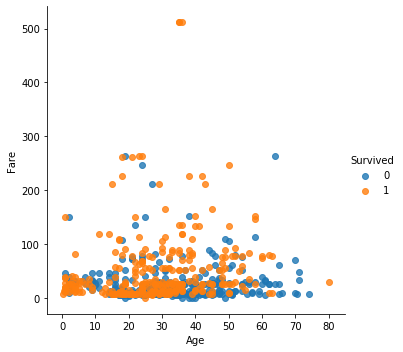

In [67]:
sns.lmplot(data=train,x='Age',y='Fare',fit_reg=False,hue='Survived')

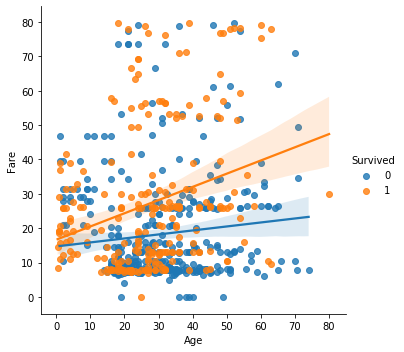

In [68]:
## 그래프를 확대
LowFare=train[train['Fare']<80]
sns.lmplot(data=LowFare,x='Age',y='Fare',hue='Survived')

# Age와 Fare은 연관이 없음

In [69]:
test.loc[test['Fare'].isnull(),'Fare']=0
# fare의 결측치를 0으로 채우기

In [70]:
#age 지우기
train= train.drop(columns='Age')
test=test.drop(columns='Age')

# SibSp & Parch

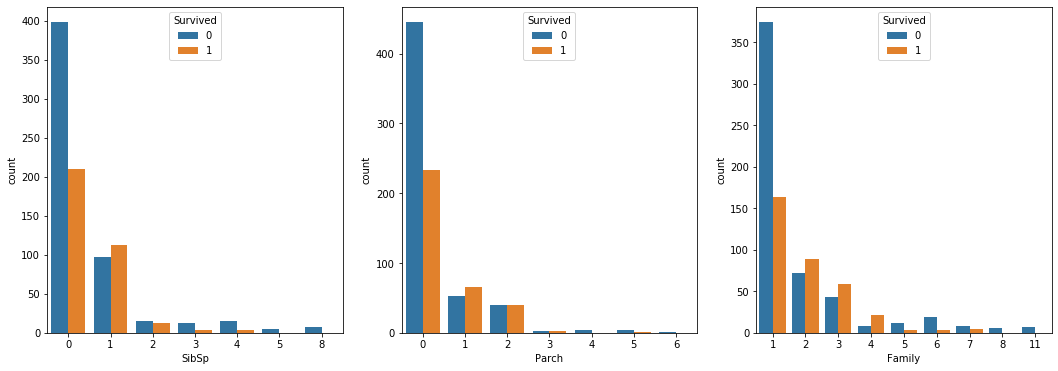

In [71]:
## 형제자매+배우자+부모+자녀+1 => 총 가족 수
train['Family']=train['SibSp']+train['Parch']+1
test['Family']=test['SibSp']+test['Parch']+1

figure, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(18,6)
sns.countplot(data=train,x='SibSp',hue='Survived',ax=ax1)
sns.countplot(data=train,x='Parch',hue='Survived',ax=ax2)
sns.countplot(data=train,x='Family',hue='Survived',ax=ax3)

# Family와 Survived간에 family 수가 2~4인 경우 생존률이 높음

# 1인 / 핵가족 / 대가족 비교

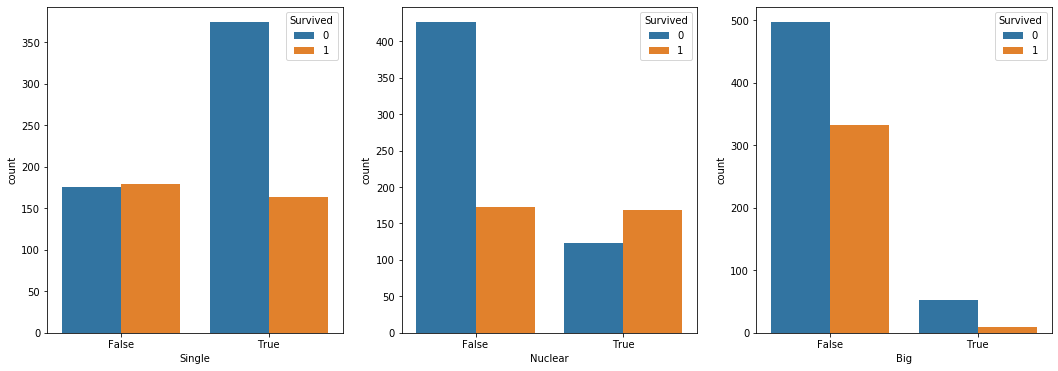

In [72]:
train['Single'] = train['Family']==1
train['Nuclear']=(2<=train['Family'])&(train['Family']<=4)
train['Big']=train['Family']>=5

test['Single']=test['Family']==1
test['Nuclear']=(2<=test['Family'])&(test['Family']<=4)
test['Big']=test['Family']>=5

figure, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(18,6)
sns.countplot(data=train,x='Single',hue='Survived',ax=ax1)
sns.countplot(data=train,x='Nuclear',hue='Survived',ax=ax2)
sns.countplot(data=train,x='Big',hue='Survived',ax=ax3)

# 핵가족인 경우에만 생존률이 높음 

In [73]:
train=train.drop(columns=['Single','Big','SibSp','Parch','Family'])
test=test.drop(columns=['Single','Big','SibSp','Parch','Family'])

# Embarked

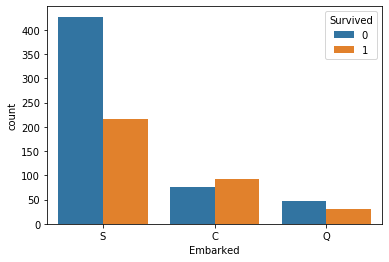

In [74]:
sns.countplot(data=train,x='Embarked',hue='Survived')

# C에서 탑승한 승객들의 생존률이 높음

In [75]:
train['EmbarkedC']=train['Embarked']=='C'
train['EmbarkedS']=train['Embarked']=='S'
train['EmbarkedQ']=train['Embarked']=='Q'
test['EmbarkedC']=test['Embarked']=='C'
test['EmbarkedS']=test['Embarked']=='S'
test['EmbarkedQ']=test['Embarked']=='Q'

train=train.drop(columns='Embarked')
test=test.drop(columns='Embarked')

# Name

In [76]:
train['Title']=train['Name'].str.split(', ').str[1].str.split('. ').str[0]
test['Title']=test['Name'].str.split(', ').str[1].str.split('. ').str[0]

train=train.drop(columns='Name')
test=test.drop(columns='Name')

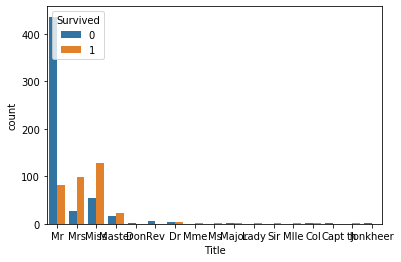

In [77]:
sns.countplot(data=train,x='Title',hue='Survived')

# Master 호칭을 가진 남자들은 생존률이 더 높음

In [78]:
train['Master']=(train['Title']=='Master')
test['Master']=(test['Title']=='Master')

train=train.drop(columns='Title')
test=test.drop(columns='Title')

train=train.drop(columns='Ticket')
test=test.drop(columns='Ticket')

# Mrs 를 뽑아주지 않은 이유는 이미 female의 생존 확률이 높다고 머신러닝 알고리즘이 판단하기 때문

# 머신러닝 모델 생성 및 학습

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
train_Y=train['Survived']
f_name=list(test)
train_X=train[f_name]
test_X=test[f_name]

print(train_X.shape,train_Y.shape,test_X.shape)
train_X.head()

(891, 11) (891,) (418, 11)


,PassengerId,Sex,Fare,Pclass_3,Pclass_2,Pclass_1,Nuclear,EmbarkedC,EmbarkedS,EmbarkedQ,Master
0,1,0,7.2500,True,False,False,True,False,True,False,False
1,2,1,71.2833,False,False,True,True,True,False,False,False
2,3,1,7.9250,True,False,False,False,False,True,False,False
3,4,1,53.1000,False,False,True,True,False,True,False,False
4,5,0,8.0500,True,False,False,False,False,True,False,False


In [81]:
model=DecisionTreeClassifier(max_depth=8,random_state=18)
model.fit(train_X,train_Y)
pred=model.predict(test_X)
submission['Survived']=pred
submission.to_csv('Result.csv')
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
